In [4]:
#!/usr/bin/env python3
import re
import matplotlib
import glob
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

%matplotlib inline

In [5]:
def preprocess_df(data_dir, sample):
    matrix_file = glob.glob(data_dir + '/*' + sample + '*matrix.csv')
    if len(matrix_file) == 1:
        df = pd.read_csv(matrix_file[0],
                         index_col=0,
                         sep='\t',             
                         header=None)
    else:
        print("Sample file is not unique.")
    
    r, c = df.shape
    if c % 2 == 0:
        mid_bin = c / 2
    else:
        mid_bin = round(c / 2)

    sum_left_bin = int(mid_bin-int(c*0.1))
    sum_right_bin = int(mid_bin+int(c*0.1))

    df.columns = [sample + '_bin_' + str(i) for i in range(0, c)]
    sum_string = sample + '_sum'
    df[sum_string] = np.sum(df.iloc[:,sum_left_bin:sum_right_bin], axis=1)

    return df

In [6]:
chr_order = np.array(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7',
                      'chr8', 'chr10', 'chr11', 'chr12', 'chr16', 'chr17', 
                      'chr18', 'chr19', 'chr20', 'chrX'])

data_dir = 'ENCODE_heatmap'

p300_df  = preprocess_df(data_dir, 'EP300-1')
K27ac_df = preprocess_df(data_dir, 'H3K27ac-1')
K4me3_df = preprocess_df(data_dir, 'H3K4me3-1')
DNase_df = preprocess_df(data_dir, 'DNase')

df = pd.concat([p300_df, K27ac_df, K4me3_df, DNase_df], axis=1)

index_fix = []
for i in df.index:
    chrom, l, r = i.split('_')
    index_fix.append(chrom + ':' + l + '-' + r)
df.index = index_fix

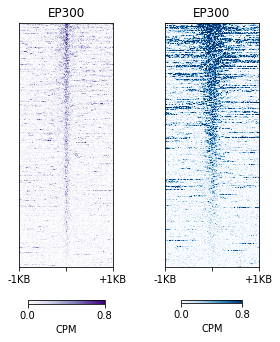

In [34]:
fig = plt.figure(figsize=(8,6))
gs = gridspec.GridSpec(nrows=1, ncols=17)

#plot p300
ax1 = fig.add_subplot(gs[:,0:5])
p300_col = [i for i in df.columns if 'EP300-1_bin' in i]
hm1 = ax1.imshow(df.sort_values(by='EP300-1_sum', ascending=True)[p300_col],
                        origin='lower',
                        cmap=plt.cm.Purples,
                        vmin=0,
                        vmax=0.8)

xmin, xmax = ax1.get_xlim()                        
ax1.set_xticks([xmin, (xmax-xmin)/2, xmax])
ax1.set_xticklabels(['-1KB', '', '+1KB'])
ax1.set_title('EP300')
ax1.set_yticks([], [])

plt.colorbar(hm1, 
            orientation='horizontal',
            pad=0.1,
            shrink=0.6,
            ticks=[0,0.8],
            label='CPM')

#plot H3K27ac
ax2 = fig.add_subplot(gs[:,6:10])
p300_col = [i for i in df.columns if 'H3K27ac-1_bin' in i]
hm2 = ax2.imshow(df.sort_values(by='H3K27ac-1_sum', ascending=True)[p300_col],
                        origin='lower',
                        cmap=plt.cm.Blues,
                        vmin=0,
                        vmax=0.8)

xmin, xmax = ax2.get_xlim()                        
ax2.set_xticks([xmin, (xmax-xmin)/2, xmax])
ax2.set_xticklabels(['-1KB', '', '+1KB'])
ax2.set_title('EP300')
ax2.set_yticks([], [])

plt.colorbar(hm2, 
            orientation='horizontal',
            pad=0.1,
            shrink=0.6,
            ticks=[0,0.8],
            label='CPM')

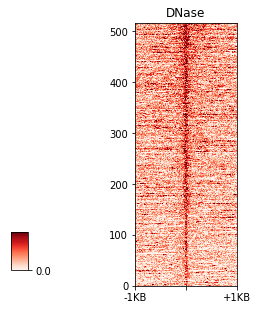

In [35]:
fig = plt.figure(figsize=(8,2.67*2))
gs = gridspec.GridSpec(nrows=1, ncols=17)

#plot p300
ax1 = fig.add_subplot(gs[:,2:6])
p300_col = [i for i in df.columns if 'DNase_bin' in i]
p300hm = ax1.imshow(df.sort_values(by='EP300-1_sum', ascending=True)[p300_col],
                        origin='lower',
                        cmap=plt.cm.Reds,
                        vmin=0,
                        vmax=0.05)

xmin, xmax = ax1.get_xlim()                        
ax1.set_xticks([xmin, (xmax-xmin)/2, xmax])
ax1.set_xticklabels(['-1KB', '', '+1KB'])
ax1.set_title('DNase')

cbaxes=fig.add_axes([0.001,0.2,0.03,0.1])
cbar1 = plt.colorbar(p300hm,
                     cax = cbaxes,
                     ticks = [0,0.1])

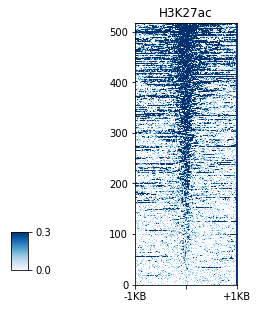

In [51]:
fig = plt.figure(figsize=(8,2.67*2))
gs = gridspec.GridSpec(nrows=1, ncols=17)

#plot p300
ax1 = fig.add_subplot(gs[:,2:6])
p300_col = [i for i in df.columns if 'H3K27ac-1' in i]
p300hm = ax1.imshow(df.sort_values(by='H3K27ac-1_sum', ascending=True)[p300_col],
                        origin='lower',
                        cmap=plt.cm.Blues,
                        vmin=0,
                        vmax=0.3)

xmin, xmax = ax1.get_xlim()                        
ax1.set_xticks([xmin, (xmax-xmin)/2, xmax])
ax1.set_xticklabels(['-1KB', '', '+1KB'])
ax1.set_title('H3K27ac')

cbaxes=fig.add_axes([0.001,0.2,0.03,0.1])
cbar1 = plt.colorbar(p300hm,
                     cax = cbaxes,
                     ticks = [0,0.3])

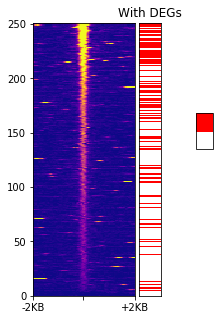

In [16]:
fig = plt.figure(figsize=(8,2.51*2))
gs = gridspec.GridSpec(nrows=1, ncols=17)

#plot p300
ax1 = fig.add_subplot(gs[:,2:6])
p300_col = [i for i in df.columns if 'EP300_bin' in i]
p300hm = ax1.pcolormesh(p300_sorted_df.loc[p300_sorted_df.Chr != 'chr18'][p300_col], 
                        cmap=plt.cm.plasma,
                        vmin=0,
                        vmax=4)
ax1.set_xticks([0, 39, 80])
ax1.set_xticklabels(['-2KB', '', '+2KB'])

#plot the hits label
hits_cmap = mpl.colors.ListedColormap(['w', 'r'])
ax4 = fig.add_subplot(gs[:,6])
hits_id = ax4.pcolormesh(p300_sorted_df.loc[p300_sorted_df.Chr != 'chr18'][['hits_color1', 'hits_color2']],
                         cmap=hits_cmap)

ax4.set_title('With DEGs')
cbaxes3 = fig.add_axes([0.5,0.53,0.03,0.1])
cbar3 = plt.colorbar(hits_id,
                     cax=cbaxes3,
                     ticks = [range(0, 2)])

cbar3.set_ticks([])
ax4.set_xticks([])
ax4.set_yticks([])
plt.savefig('p300_non-chr18.pdf')

[]

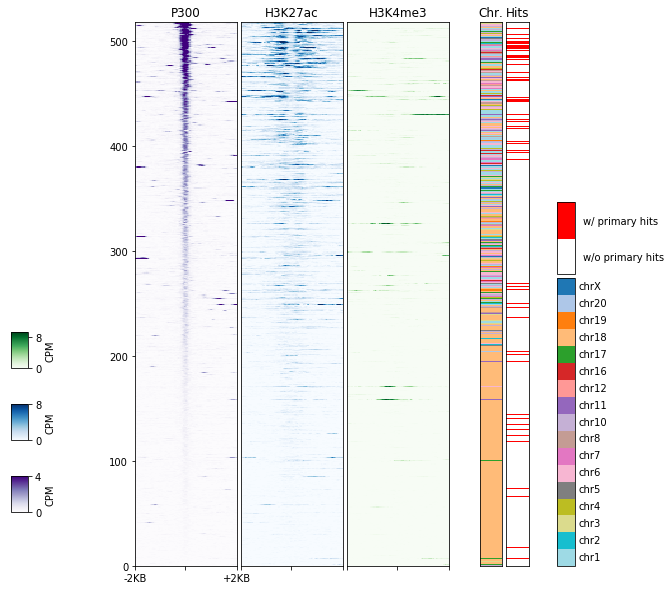

In [27]:
fig = plt.figure(figsize=(8,10))
gs = gridspec.GridSpec(nrows=1, ncols=17)

#plot p300
ax1 = fig.add_subplot(gs[:,2:6])
p300_col = [i for i in df.columns if 'EP300_bin' in i]
p300hm = ax1.pcolormesh(df.sort_values(by=['EP300_sum'])[p300_col], 
                        cmap=plt.cm.Purples,
                        vmin=0,
                        vmax=4)
ax1.set_xticks([0, 39, 80])
ax1.set_xticklabels(['-2KB', '', '+2KB'])
ax1.set_title('P300')

cbaxes=fig.add_axes([0.001,0.2,0.03,0.05])
cbar1 = plt.colorbar(p300hm,
                     cax = cbaxes,
                     ticks = [0,4])

cbar1.ax.set_ylabel('CPM')

#plot H3K27ac
ax2 = fig.add_subplot(gs[:,6:10])
k27ac_col = [i for i in df.columns if 'H3K27ac_bin' in i]
k27achm = ax2.pcolormesh(df.sort_values(by=['EP300_sum'])[k27ac_col],
                         cmap=plt.cm.Blues,
                         vmin=0,
                         vmax=8)

ax2.set_title('H3K27ac')

cbaxes=fig.add_axes([0.001,0.3,0.03,0.05])
cbar1 = plt.colorbar(k27achm,
                     cax = cbaxes,
                     ticks = [0,8])

cbar1.ax.set_ylabel('CPM')
ax2.set_yticks([])
ax2.set_xticks([0, 39, 80])
ax2.set_xticklabels([])

#plot H3K3me3
ax3 = fig.add_subplot(gs[:,10:14])
k4me3_col = [i for i in df.columns if 'H3K4me3_bin' in i]
k4me3hm = ax3.pcolormesh(df.sort_values(by=['EP300_sum'])[k4me3_col], 
                        cmap=plt.cm.Greens)

ax3.set_title('H3K4me3')

cbaxes=fig.add_axes([0.001,0.4,0.03,0.05])
cbar1 = plt.colorbar(k4me3hm,
                     cax = cbaxes,
                     ticks = [0,8])

cbar1.ax.set_ylabel('CPM')
ax3.set_yticks([])
ax3.set_xticks([0, 39, 80])
ax3.set_xticklabels([])

#plot the chromosome color
chr_cmap = plt.get_cmap('tab20_r', 17)
ax3 = fig.add_subplot(gs[:,15])
chr_id = ax3.pcolormesh(df.sort_values(by=['EP300_sum'])[['chr_color1', 'chr_color2']],
                        cmap=chr_cmap)

ax3.set_title('Chr.')
cbaxes2 = fig.add_axes([0.95,0.125,0.03,0.4])
cbar2 = plt.colorbar(chr_id,
                     cax=cbaxes2,
                     ticks = [range(0, 17)])

cbar2.set_ticks([])
for i, lab in enumerate(chr_order):
    cbar2.ax.text(1.2, 0.02+(i)*1/17, lab)
ax3.set_xticks([])
ax3.set_yticks([])

#plot the hits label
hits_cmap = mpl.colors.ListedColormap(['w', 'r'])
ax4 = fig.add_subplot(gs[:,16])
hits_id = ax4.pcolormesh(df.sort_values(by=['EP300_sum'])[['hits_color1', 'hits_color2']],
                         cmap=hits_cmap)

ax4.set_title('Hits')
cbaxes3 = fig.add_axes([0.95,0.53,0.03,0.1])
cbar3 = plt.colorbar(hits_id,
                     cax=cbaxes3,
                     ticks = [range(0, 2)])

cbar3.set_ticks([])
for i, lab in enumerate(['w/o primary hits', 'w/ primary hits']):
    cbar3.ax.text(1.5, 0.2+(i)*1/2, lab)
ax4.set_xticks([])
ax4.set_yticks([])

KeyError: "['hits_color1' 'hits_color2'] not in index"

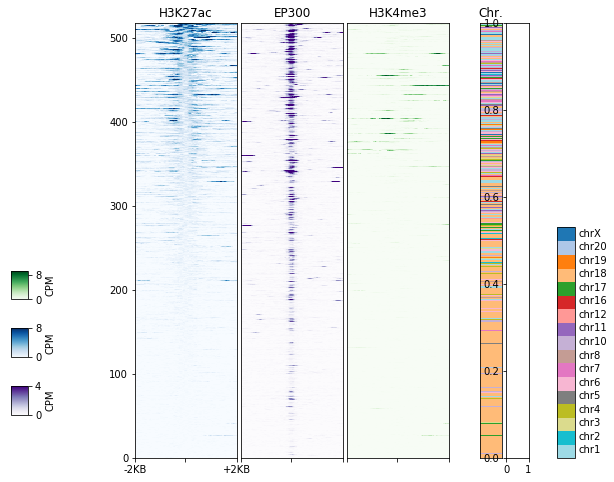

In [17]:
fig = plt.figure(figsize=(8,8))
gs = gridspec.GridSpec(nrows=1, ncols=17)

#plot H3K27ac
ax2 = fig.add_subplot(gs[:,2:6])
k27ac_col = [i for i in df.columns if 'H3K27ac_bin' in i]
k27achm = ax2.pcolormesh(df.sort_values(by=['H3K27ac_sum'])[k27ac_col], 
                         cmap=plt.cm.Blues,
                         vmin=0,vmax=8)

ax2.set_title('H3K27ac')

cbaxes=fig.add_axes([0.001,0.3,0.03,0.05])
cbar1 = plt.colorbar(k27achm,
                     cax = cbaxes,
                     ticks = [0,8])

cbar1.ax.set_ylabel('CPM')
ax2.set_xticks([0, 39, 80])
ax2.set_xticklabels(['-2KB', '', '+2KB'])

#plot p300
ax1 = fig.add_subplot(gs[:,6:10])
p300_col = [i for i in df.columns if 'EP300_bin' in i]
p300hm = ax1.pcolormesh(df.sort_values(by=['H3K27ac_sum'])[p300_col], 
                        cmap=plt.cm.Purples,vmin=0,vmax=4)
ax1.set_xticks([0, 39, 80])
ax1.set_xticklabels([])
ax1.set_yticks([])
ax1.set_title('EP300')

cbaxes=fig.add_axes([0.001,0.2,0.03,0.05])
cbar1 = plt.colorbar(p300hm,
                     cax = cbaxes,
                     ticks = [0,4])

cbar1.ax.set_ylabel('CPM')

#plot H3K3me3
ax3 = fig.add_subplot(gs[:,10:14])
k4me3_col = [i for i in df.columns if 'H3K4me3_bin' in i]
k4me3hm = ax3.pcolormesh(df.sort_values(by=['H3K27ac_sum'])[k4me3_col], 
                        cmap=plt.cm.Greens)

ax3.set_title('H3K4me3')

cbaxes=fig.add_axes([0.001,0.4,0.03,0.05])
cbar1 = plt.colorbar(k4me3hm,
                     cax = cbaxes,
                     ticks = [0,8])

cbar1.ax.set_ylabel('CPM')
ax3.set_yticks([])
ax3.set_xticks([0, 39, 80])
ax3.set_xticklabels([])

#plot the chromosome color
chr_cmap = plt.get_cmap('tab20_r', 17)
ax3 = fig.add_subplot(gs[:,15])
chr_id = ax3.pcolormesh(df.sort_values(by=['H3K27ac_sum'])[['chr_color1', 'chr_color2']],
                        cmap=chr_cmap)

ax3.set_title('Chr.')
cbaxes2 = fig.add_axes([0.95,0.125,0.03,0.4])
cbar2 = plt.colorbar(chr_id,
                     cax=cbaxes2,
                     ticks = [range(0, 17)])

cbar2.set_ticks([])
for i, lab in enumerate(chr_order):
    cbar2.ax.text(1.2, 0.02+(i)*1/17, lab)
ax3.set_xticks([])
ax3.set_yticks([])

#plot the hits label
hits_cmap = mpl.colors.ListedColormap(['w', 'r'])
ax4 = fig.add_subplot(gs[:,16])
hits_id = ax4.pcolormesh(df.sort_values(by=['H3K27ac_sum'])[['hits_color1', 'hits_color2']],
                         cmap=hits_cmap)

ax4.set_title('Hits')
cbaxes3 = fig.add_axes([0.95,0.53,0.03,0.1])
cbar3 = plt.colorbar(hits_id,
                     cax=cbaxes3,
                     ticks = [range(0, 2)])

cbar3.set_ticks([])
for i, lab in enumerate(['w/o primary hits', 'w/ primary hits']):
    cbar3.ax.text(1.5, 0.2+(i)*1/2, lab)
ax4.set_xticks([])
ax4.set_yticks([])